# Понижение размерности

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

from sklearn.decomposition import PCA

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

## 1.0 Загрузка данных

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
X_train = mnist['data'][:60000]
y_train = mnist['target'][:60000].astype(np.int32)

X_test = mnist['data'][60000:]
y_test = mnist['target'][60000:].astype(np.int32)

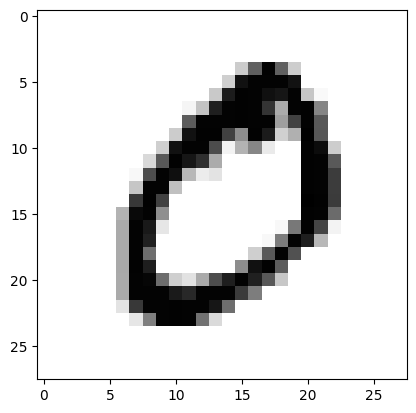

In [ ]:
plt.imshow(255-np.array(X_train.loc[1]).reshape(28,28),cmap='gray')
plt.show()

In [ ]:
X_train.shape

(60000, 784)

In [ ]:
X_test.shape

(10000, 784)

### 1.1 Примение метода главных компонент для уменьшения размерности данных. Размерность. Сокращение размерности до двух

In [ ]:
pca = PCA(n_components=2)
X_viz = pca.fit_transform(X_train)
X_viz

array([[ 123.9230497 , -312.68028525],
       [1011.72491702, -294.85103169],
       [ -51.8546254 ,  392.16556002],
       ...,
       [-178.0482584 ,  160.08770543],
       [ 130.61806432,   -5.5733761 ],
       [-173.42167669,  -24.7009276 ]])

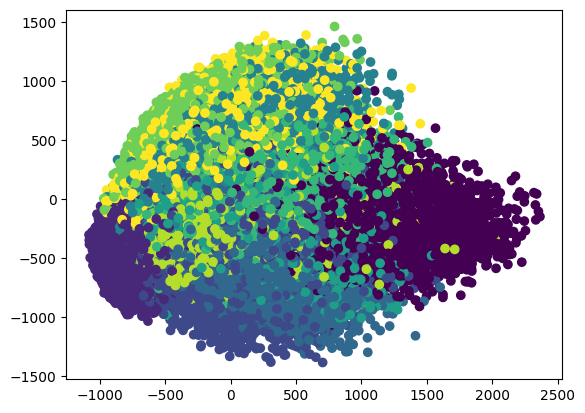

In [ ]:
plt.scatter(X_viz[:, 0], X_viz[:, 1], c = y_train)

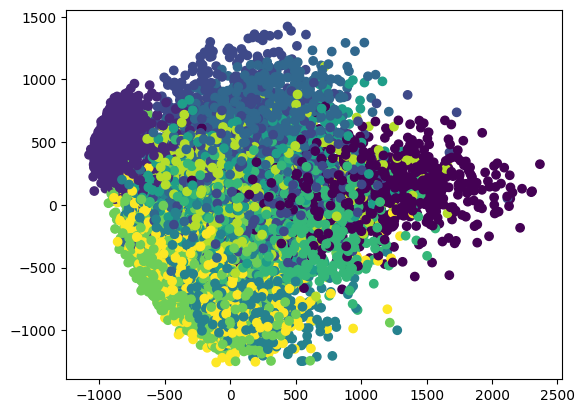

In [ ]:
pca = PCA(n_components=2)
X_viz = pca.fit_transform(X_test)
plt.scatter(X_viz[:, 0], X_viz[:, 1], c = y_test)

### 1.2 Cлучайный лес на исходных данных

In [ ]:
rf = RandomForestClassifier(n_estimators=10, random_state=42)
t0 = time.time()
rf.fit(X_train, y_train)
t1 = time.time()

y_pred = rf.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(t1-t0)

0.9492
8.214658498764038


In [ ]:
pca = PCA(n_components=2)
X_train_red =  pca.fit_transform(X_train)
X_test_red = pca.transform(X_test)

rf = RandomForestClassifier(n_estimators=10, random_state=42)
t0 = time.time()
rf.fit(X_train_red, y_train)
t1 = time.time()

y_pred = rf.predict(X_test_red)
print(accuracy_score(y_test, y_pred))
print(t1-t0)

0.4095
1.4399211406707764


In [ ]:
pca = PCA(n_components=10)
X_train_red =  pca.fit_transform(X_train)
X_test_red = pca.transform(X_test)

rf = RandomForestClassifier(n_estimators=10, random_state=42)
t0 = time.time()
rf.fit(X_train_red, y_train)
t1 = time.time()

y_pred = rf.predict(X_test_red)
print(accuracy_score(y_test, y_pred))
print(t1-t0)

0.895
4.711230754852295


### 1.3 Логистическая регрессиея

In [ ]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_tr_sc = scaler.transform(X_train)
X_te_sc = scaler.transform(X_test)

In [ ]:
lr = LogisticRegression(max_iter=100, random_state=42, multi_class='multinomial')
t0 = time.time()
lr.fit(X_tr_sc, y_train)
t1 = time.time()

y_pred = lr.predict(X_te_sc)
print(accuracy_score(y_test, y_pred))
print(t1-t0)

0.9246
57.16868305206299


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
lr = LogisticRegression(max_iter=100, random_state=42, multi_class='multinomial')
t0 = time.time()
lr.fit(X_train, y_train)
t1 = time.time()

y_pred = lr.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(t1-t0)

0.9255
51.44922995567322


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
pca = PCA(n_components=0.9)
X_train_red = pca.fit_transform(X_train)
X_test_red = pca.transform(X_test)

lr = LogisticRegression(max_iter=250, random_state=42, multi_class='multinomial', solver='liblinear')

t0 = time.time()
lr.fit(X_train_red, y_train)
t1 = time.time()

y_pred = lr.predict(X_test_red)
print(accuracy_score(y_test, y_pred))
print(t1-t0)

ValueError: ignored

# Кластеризация

In [ ]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import homogeneity_score, silhouette_score

### 2.0 Исходные данные

In [ ]:
from sklearn import datasets

digits = datasets.load_digits()
X, y, z = digits['data'], digits['target'], digits['images']

X.shape

(1797, 64)

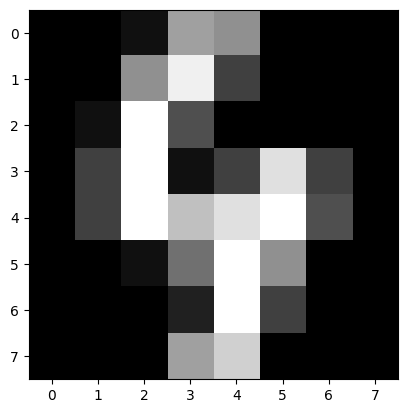

In [ ]:
plt.imshow(X[111].reshape(8,8), cmap='gray')

### 2.1 Мметод главных компонент для уменьшения размерности до двух

In [ ]:
pca = PCA(n_components=2)
pca_X = pca.fit_transform(X)

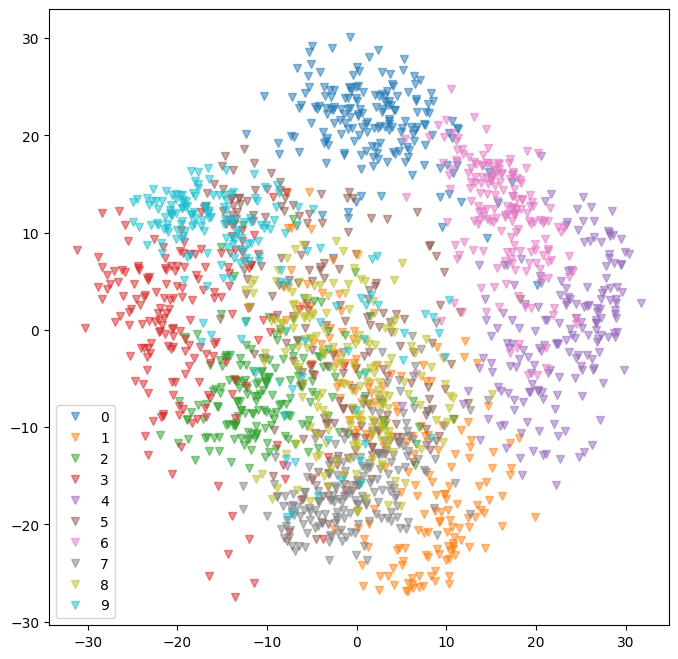

In [ ]:
plt.figure(figsize=(8, 8))
for i in range(10):
    plt.plot(pca_X[y == i, 0],
             pca_X[y == i, 1],
             'v',
             label=i,
             alpha=0.5)

plt.legend()
plt.show()

### 2.2 Кластеризация данных методом kMeans

In [ ]:
km = KMeans(n_clusters=10, random_state=11)
km.fit(X)
labels = km.predict(X)
labels

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([3, 2, 2, ..., 2, 0, 0], dtype=int32)

In [ ]:
max_digit = np.argmax(np.bincount(y[labels == 0]))
max_digit

9

In [ ]:
incorrect = np.where(np.logical_and(labels == 0, y != max_digit))[0]
print(len(incorrect), len(np.where(labels == 0)[0])) # Сколько неверных 9 было определено
print(incorrect)

106 245
[   5  261  264  289  291  309  332  358  370  373  378  379  394  414
  421  424  426  439  446  448  449  457  482  500  513  515  519  529
  531  539  541  549  551  562  575  578  579  590  599  607  618  636
  654  674  686  703  722  768  773  814  816  899  913  920  923  930
  933  937  938  940  943  951  955  973  976  978  997 1010 1015 1018
 1021 1026 1028 1057 1067 1103 1165 1292 1400 1404 1423 1430 1433 1440
 1443 1447 1448 1450 1453 1455 1461 1486 1491 1511 1517 1524 1529 1537
 1544 1705 1729 1741 1769 1784 1787 1796]


In [ ]:
homogeneity_score(y, labels)

0.7383147434325723

In [ ]:
silhouette_score(X, labels)

0.1823530070670752

### 2.4 Метрики homogeneity_score и silhouette_score

In [ ]:
dbs = DBSCAN(eps=1.8, min_samples=10)
y_hat = dbs.fit_predict(pca_X)

print(set(y_hat))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, -1}


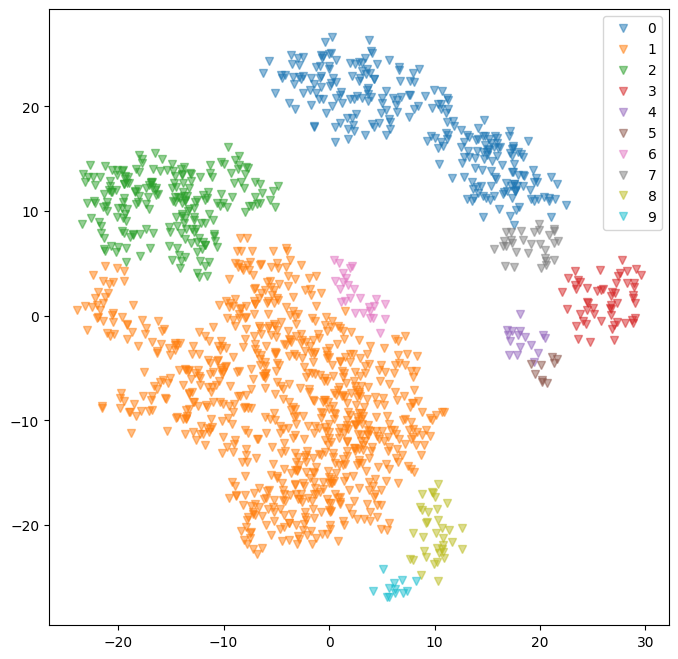

In [ ]:
plt.figure(figsize=(8, 8))
for i in range(10):
    plt.plot(pca_X[y_hat == i, 0],
             pca_X[y_hat == i, 1],
             'v',
             label=i,
             alpha=0.5)

plt.legend()
plt.show()